In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [18]:
def myfunc(x):

    if 0.9 <= x <= 1.0:
        y =  10 * (x - 0.9)
    elif 1.0< x <= 1.1:
        y =  10 * (1.1 - x)
    else:
        y =  0

    return float(y)

In [19]:
#Define the domain
nx = 41
nt = 6
sigma = 0.01
c = 1
dx = 0.05
dt = sigma*dx/c

x = np.arange(0, 2+dx, dx)
u = np.zeros(nx)
un = np.zeros(nx)
uzero = np.zeros(nx)

In [20]:
uzero = np.vectorize(myfunc)(x)

In [21]:
print(uzero)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ]


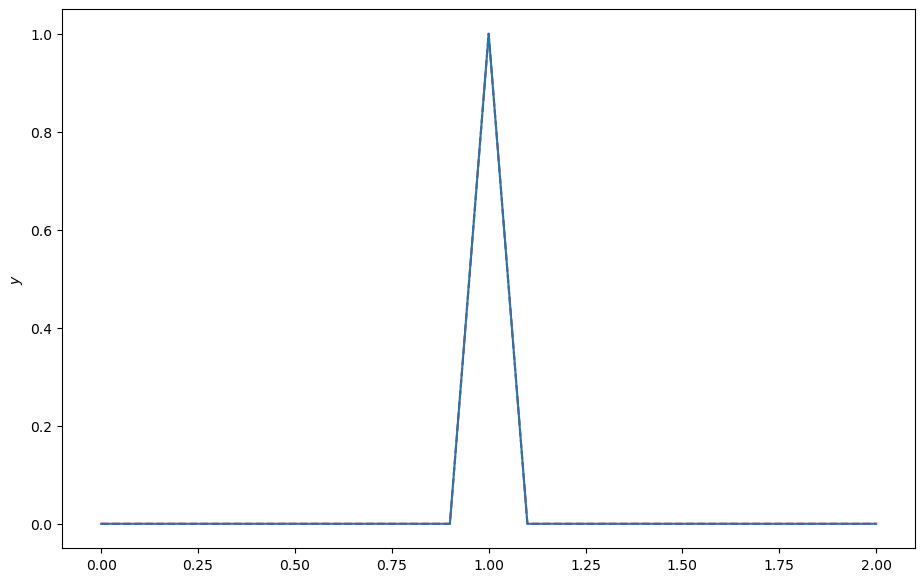

In [22]:
fig, ax = plt.subplots(figsize=(11, 7), dpi=100)
(ln0,)= plt.plot(x, uzero, color='r', linestyle='--')
(ln,) = plt.plot(x, uzero)
ax.set_ylabel('$y$')

u = uzero.copy()






In [23]:
def animate(i):
    #Central Difference
    u[1:-1] = u[1:-1] - c * dt / (2*dx) * (u[2:] - u[0:-2])
    u[0] = u[-1]
    #Forward Difference
    # u[1:] = u[1:] - c * dt / dx * (u[1:] - u[0:-1])
    # u[0] = u[-1]

    ln.set_ydata(u)
    return (ln,)

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=50)
plt.rcParams['animation.html'] = 'html5'
ani